In [2]:
import pandas as pd
from datasets import load_from_disk
from tqdm import tqdm

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
split_ds_path='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-clean-split'

In [4]:
ds=load_from_disk(split_ds_path)
ds

DatasetDict({
    train: Dataset({
        features: ['audio', 'start', 'end', 'transcription', 'eaf_source', 'wav_source', 'raw_transcription', 'clip', 'wav_rawpath', 'path', 'allosaurus', 'clap_ipa_cos_sim', 'wada_snr', 'nist_stnr', 'speaker-diarization-3.1', 'voice-activity-detection', 'whisper-large-v3', 'clapipa-transcription-allosaurus', 'vad_s', 'drz_s', 'trans_len', 'pcnt_speech', 'trans_len_sq', 'trans_len_log', 'cos_sim_softmax', 'cos_sim_log', 'duration'],
        num_rows: 16384
    })
    validation: Dataset({
        features: ['audio', 'start', 'end', 'transcription', 'eaf_source', 'wav_source', 'raw_transcription', 'clip', 'wav_rawpath', 'path', 'allosaurus', 'clap_ipa_cos_sim', 'wada_snr', 'nist_stnr', 'speaker-diarization-3.1', 'voice-activity-detection', 'whisper-large-v3', 'clapipa-transcription-allosaurus', 'vad_s', 'drz_s', 'trans_len', 'pcnt_speech', 'trans_len_sq', 'trans_len_log', 'cos_sim_softmax', 'cos_sim_log', 'duration'],
        num_rows: 2048
    })
    

In [5]:
# df=pd.DataFrame(columns=ds['train'].column_names+['split'])
split_dfs=[]
for split in ds:
    split_df=ds[split].remove_columns('audio').to_pandas()
    split_df['split']=split
    split_dfs.append(split_df)
df=pd.concat(split_dfs, ignore_index=True)
print(df.shape)
df.head()

(20480, 27)


,start,end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,vad_s,drz_s,trans_len,pcnt_speech,trans_len_sq,trans_len_log,cos_sim_softmax,cos_sim_log,duration,split
0,217011.0,219552.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,2.379,2.447,23,0.936246,3.135494,3.135494,0.000044,-10.039731,2.541,train
1,221371.0,225023.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s41ms371-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s41ms371-m03s45ms023.wav,a j a d i v a n a l a,...,3.375,3.510,23,0.924151,3.135494,3.135494,0.000044,-10.028157,3.652,train
2,283401.0,286528.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,3.088,3.037,29,0.987528,3.367296,3.367296,0.000042,-10.080580,3.127,train
3,288835.0,291580.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s48ms835-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s48ms835-m04s51ms580.wav,a t e i j a p e d e ð a ɡ a n a ð a,...,2.413,2.649,29,0.879053,3.367296,3.367296,0.000044,-10.025673,2.745,train
4,304737.0,307762.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m05s04ms737-m05...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m05s04ms737-m05s07ms762.wav,a e j e ð e d e ð a l a m a l a,...,2.920,2.919,29,0.965289,3.367296,3.367296,0.000042,-10.068530,3.025,train


In [6]:
df.loc[0]

start                                                                        217011.0
end                                                                          219552.0
transcription                                                 àprí jɜ̀dí ðáŋàlà
eaf_source                          /Users/markjos/Library/CloudStorage/GoogleDriv...
wav_source                          /Users/markjos/Library/CloudStorage/GoogleDriv...
raw_transcription                                             àprí jɜ̀dí ðáŋàlà
clip                                data/tira-asr/clips/HH01082021-m03s37ms011-m03...
wav_rawpath                         /Users/markjos/Library/CloudStorage/GoogleDriv...
path                                           HH01082021-m03s37ms011-m03s39ms552.wav
allosaurus                                                    a e i a d i ɡ a m a l a
clap_ipa_cos_sim                                                             0.705214
wada_snr                                              

There are 45 ungrammatical sentences in the dataset. Whoops.

In [7]:
df['raw_transcription'].str.contains('\*').value_counts()

raw_transcription
False    20435
True        45
Name: count, dtype: int64

The train split contains 21 recordings not found in test or validation. Neither test nor validation partitions have any recordings only found in them, but they each have 1 recording not found in train.

In [8]:
train=df['split']=='train'
validation=df['split']=='validation'
test=df['split']=='test'

train_wavs=pd.Series(df[train]['wav_source'].unique())
val_wavs=pd.Series(df[validation]['wav_source'].unique())
test_wavs=pd.Series(df[test]['wav_source'].unique())

df['split']
train_only = train_wavs[~train_wavs.isin(val_wavs) & ~train_wavs.isin(test_wavs)]
val_only = val_wavs[~val_wavs.isin(train_wavs)]# & ~val_wavs.isin(test_wavs)]
test_only = test_wavs[~test_wavs.isin(train_wavs)]# & ~test_wavs.isin(val_wavs)]

train_only.shape, val_only.shape, test_only.shape

((21,), (1,), (1,))

Let's add 30s before and after each record and see how many overlaps we create.

In [9]:
# remaining=((30-df['duration'])*1_000).astype(int)
df['long_start']=df['start']-30_000
df['long_end']=df['end']+30_000
df[['long_start', 'long_end']]

,long_start,long_end
0,187011.0,249552.0
1,191371.0,255023.0
2,253401.0,316528.0
3,258835.0,321580.0
4,274737.0,337762.0
...,...,...
20475,554799.0,615373.0
20476,1964053.0,2024599.0
20477,1402547.0,1463467.0
20478,1587160.0,1647733.0


In [10]:
def find_overlap(row):
    start=row['long_start']
    end=row['long_end']
    wav=row['wav_source']

    has_wav=df['wav_source']==wav
    after_start=df['start']>=start
    before_end=df['end']<=end
    overlap=has_wav&after_start&before_end
    return df.loc[overlap].index.tolist()
df['overlap']=df.apply(find_overlap, axis=1)
df['overlap']

0                                                   [0, 1]
1                                                   [0, 1]
2                                                [2, 3, 4]
3                                                [2, 3, 4]
4                                                [2, 3, 4]
                               ...                        
20475    [15837, 15838, 15839, 15840, 15841, 15842, 158...
20476                                [15913, 15914, 20476]
20477    [16018, 16019, 16020, 16021, 16022, 16023, 160...
20478                                [16025, 16026, 20478]
20479                  [16366, 16367, 16368, 16369, 20479]
Name: overlap, Length: 20480, dtype: object

In [11]:
df['num_overlap']=df['overlap'].apply(len)
df['num_overlap'].mean()

6.39443359375

In [12]:
get_split_from_index = lambda ilist: [df.at[i, 'split'] for i in ilist]
df['overlap_split']=df['overlap'].apply(get_split_from_index)
df['overlap_split']

0                                           [train, train]
1                                           [train, train]
2                                    [train, train, train]
3                                    [train, train, train]
4                                    [train, train, train]
                               ...                        
20475    [train, train, train, train, train, train, tra...
20476                                 [train, train, test]
20477    [train, train, train, train, train, train, tra...
20478                                 [train, train, test]
20479                   [train, train, train, train, test]
Name: overlap_split, Length: 20480, dtype: object

In [13]:
df['overlap_split'].apply(set).value_counts()

overlap_split
{train}                      13367
{validation, train}           2322
{train, test}                 2124
{test}                         931
{validation}                   921
{validation, test}             438
{validation, train, test}      377
Name: count, dtype: int64

Let's pick a subset of records such that there is overlap between any of them.
Let's also exclude an record which has labels from multiple splits included.

In [14]:
collapsed_idcs=[]
covered_idcs=[]
for i, row in tqdm(df.iterrows(), total=len(df)):
    if len(set(row['overlap_split']))>1:
        # ignore recrods that overlap with labels from multiple partitions
        continue
    # if no labels in this record have been picked already, add to subset
    if not any(j in collapsed_idcs for j in row['overlap']):
        collapsed_idcs.append(i)
        covered_idcs.extend(row['overlap'])
df_sub=df.loc[collapsed_idcs]
df_sub.shape

100%|██████████| 20480/20480 [00:02<00:00, 9913.09it/s]


(5354, 32)

Let's update the 'start', 'end' and 'transcription' columns to have the values for each label within the interval.

In [15]:
get_values_for_overlap_span = lambda idcs, col: df.loc[idcs][col].tolist()

df_sub['start_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'start'))
df_sub['end_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'end'))
df_sub['trans_list']=df['overlap'].apply(lambda x: get_values_for_overlap_span(x, 'transcription'))

In [16]:
df_sub['trans_list']

0        [àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...
2        [àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...
5        [àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...
7        [àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...
10       [àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...
                               ...                        
20439                                         [làrdɜ̀dì]
20440                                       [lɛ̀àrdɛ̀dì]
20455    [là t̪ə́rvàvɛ̀, là t̪ə́rvàvì, lìjàjɔ̀, ...
20459    [lìjàjɔ̀, là jájɛ̀, là jájɛ̀, lə̀jàrjɔ́...
20466                                   [là bŕɽàɽìðì]
Name: trans_list, Length: 5354, dtype: object

Let's load phone embeddings so we can find which records have the most diversity of Tira labels

In [17]:
import torch
from torch.nn.functional import cosine_similarity
phone_embed_path='/Users/markjos/projects/malachor5/data/pyarrow-datasets/tira-clean-split/clap_ipa_phone_embeds.pt'
embeds=torch.load(phone_embed_path)
embeds.shape

torch.Size([20480, 512])

In [18]:
cosine_similarity(embeds, embeds, dim=1).shape

torch.Size([20480])

In [19]:
embeds.mean(dim=0).shape

torch.Size([512])

<Axes: >

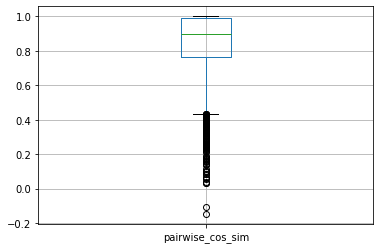

In [20]:
def pairwise_cos_sim(idcs):
    if len(idcs)==0:
        return 1
    embed_list=[]
    comparanda=[]
    for i in idcs:
        embed=embeds[i]
        other_idcs = [j for j in idcs if j!=i]
        other_embeds = embeds[other_idcs]
        embed_list.append(embed)
        comparanda.append(other_embeds.mean(dim=0))
    return cosine_similarity(torch.stack(embed_list), torch.stack(comparanda)).mean().item()

df_sub['pairwise_cos_sim']=df_sub['overlap'].apply(pairwise_cos_sim)
df_sub.boxplot('pairwise_cos_sim')

In [29]:
df_sub=df_sub.rename({
    'start':'old_start',
    'end':'old_end',
    'long_start':'start',
    'long_end':'end',
}, axis=1)
df_sub.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011.0,219552.0,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,train,187011.0,249552.0,"[0, 1]",2,"[train, train]","[217011.0, 221371.0]","[219552.0, 225023.0]","[àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...",0.659426
2,283401.0,286528.0,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401.0,316528.0,"[2, 3, 4]",3,"[train, train, train]","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","[àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...",0.270774
5,373451.0,377362.0,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m06s13ms451-m06s17ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451.0,407362.0,"[5, 6]",2,"[train, train]","[373451.0, 378899.0]","[377362.0, 383279.0]","[àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...",0.285611
7,514659.0,518038.0,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s34ms659-m08s38ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659.0,548038.0,"[7, 8, 9]",3,"[train, train, train]","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.690790
10,564731.0,567740.0,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m09s24ms731-m09s27ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731.0,597740.0,"[9, 10, 11]",3,"[train, train, train]","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.920946


In [34]:
for column in ['start', 'end', 'old_start', 'old_end']:
    df_sub[column]=df_sub[column].astype(int)
df_sub.head()

,old_start,old_end,transcription,eaf_source,wav_source,raw_transcription,clip,wav_rawpath,path,allosaurus,...,split,start,end,overlap,num_overlap,overlap_split,start_list,end_list,trans_list,pairwise_cos_sim
0,217011,219552,àprí jɜ̀dí ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jɜ̀dí ðáŋàlà,data/tira-asr/clips/HH01082021-m03s37ms011-m03...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m03s37ms011-m03s39ms552.wav,a e i a d i ɡ a m a l a,...,train,187011,249552,"[0, 1]",2,"[train, train]","[217011.0, 221371.0]","[219552.0, 225023.0]","[àprí jɜ̀dí ðáŋàlà, àprí jɜ̀dí ðáŋà...",0.659426
2,283401,286528,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m04s43ms401-m04...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m04s43ms401-m04s46ms528.wav,a p e i e p e l e ð a l a m a l a,...,train,253401,316528,"[2, 3, 4]",3,"[train, train, train]","[283401.0, 288835.0, 304737.0]","[286528.0, 291580.0, 307762.0]","[àprí jə̀və̀lɛ̀ðɔ́ ðáŋàlà, àprí jə̀və̀l...",0.270774
5,373451,377362,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà,data/tira-asr/clips/HH01082021-m06s13ms451-m06...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m06s13ms451-m06s17ms362.wav,a p i j a b ɛ l ɛ j e d e b a ŋ a l a,...,train,343451,407362,"[5, 6]",2,"[train, train]","[373451.0, 378899.0]","[377362.0, 383279.0]","[àprí jàvə́lɛ̀ðɛ̌ ðàŋàlà, àprí jàvə́l...",0.285611
7,514659,518038,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m08s34ms659-m08...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m08s34ms659-m08s38ms038.wav,a p r e ʂ i j a b ɛ l i ð ɔ r a ŋ a n a,...,train,484659,548038,"[7, 8, 9]",3,"[train, train, train]","[514659.0, 524380.0, 540389.0]","[518038.0, 527963.0, 543475.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.690790
10,564731,567740,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,/Users/markjos/Library/CloudStorage/GoogleDriv...,/Users/markjos/Library/CloudStorage/GoogleDriv...,àprí jávə̀lɛ̀ðɔ́ ðáŋàlà,data/tira-asr/clips/HH01082021-m09s24ms731-m09...,/Users/markjos/Library/CloudStorage/GoogleDriv...,HH01082021-m09s24ms731-m09s27ms740.wav,a e a b l e ð e ð a m a ð a,...,train,534731,597740,"[9, 10, 11]",3,"[train, train, train]","[540389.0, 564731.0, 590317.0]","[543475.0, 567740.0, 593363.0]","[àprí jávə̀lɛ̀ðɔ́ ðáŋàlà, àprí jávə̀l...",0.920946


In [35]:
df_sub.to_csv('../data/tira-code-mixed/metadata.csv',index=False)